In [9]:
from PIL import Image
import os

def convert_image(input_path, output_path, output_format):
    try:
        # Open the image
        with Image.open(input_path) as img:
            # Convert and save the image to the desired format
            img.save(output_path, format=output_format)
            print(f"Image converted successfully to {output_format} format.")
    except Exception as e:
        print(f"An error occurred: {e}")

def main():
    input_path = input("Enter the path to the input image: ")
    output_format = input("Enter the desired output format (e.g., JPEG, PNG, BMP, GIF): ").upper()

    # Validate output format
    if output_format not in ['JPEG', 'PNG', 'BMP', 'GIF']:
        print("Invalid output format. Please choose from JPEG, PNG, BMP, or GIF.")
        return

    # Extract the file name and extension
    file_name, file_extension = os.path.splitext(input_path)

    # If the input file already has an extension, remove it
    file_name_without_ext = file_name.split('.')[0]

    # Set the output path
    output_path = f"{file_name_without_ext}_converted.{output_format.lower()}"

    # Convert the image
    convert_image(input_path, output_path, output_format)
if __name__ == "__main__":
    main()

KeyboardInterrupt: Interrupted by user

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing values:
sepal_l

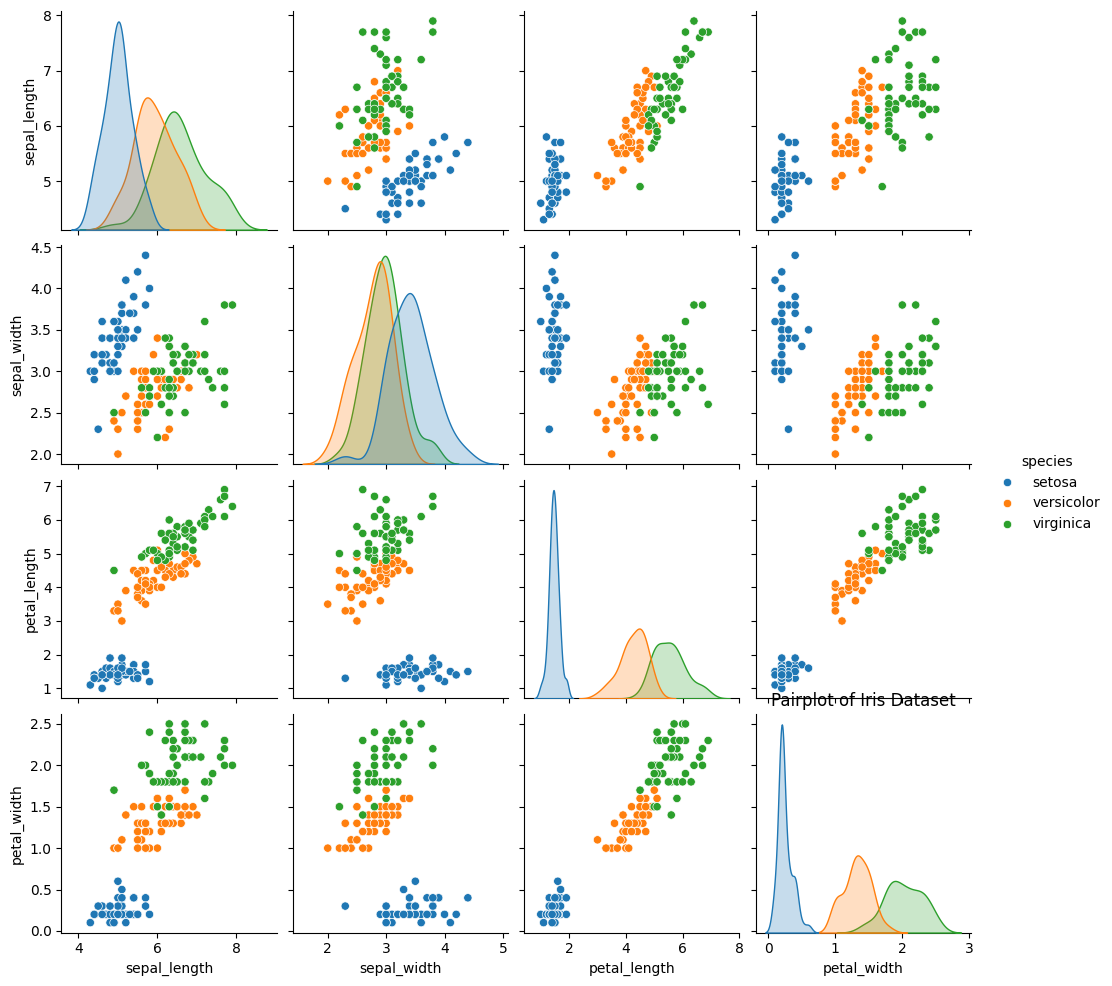

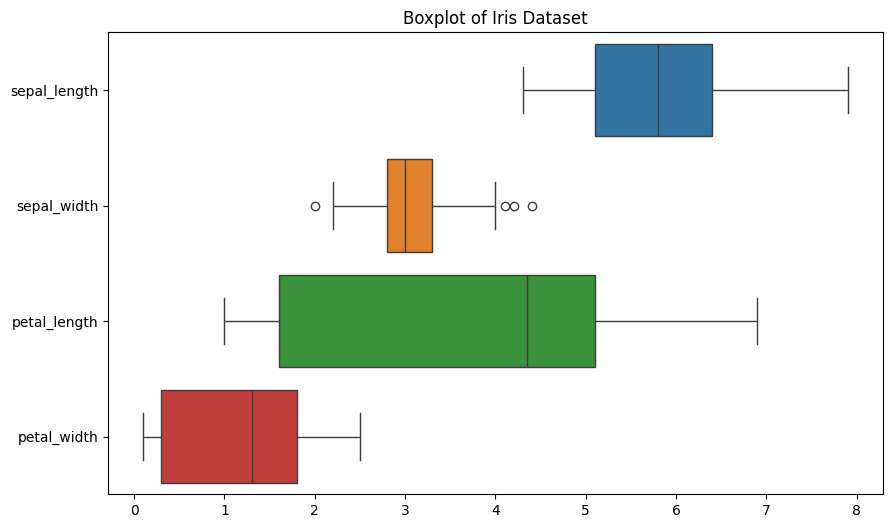

<Figure size 1000x600 with 0 Axes>

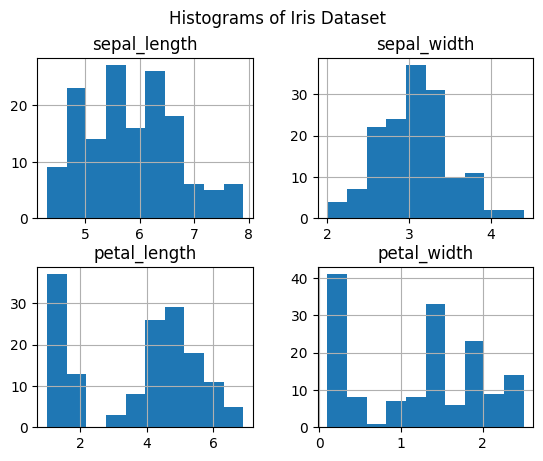

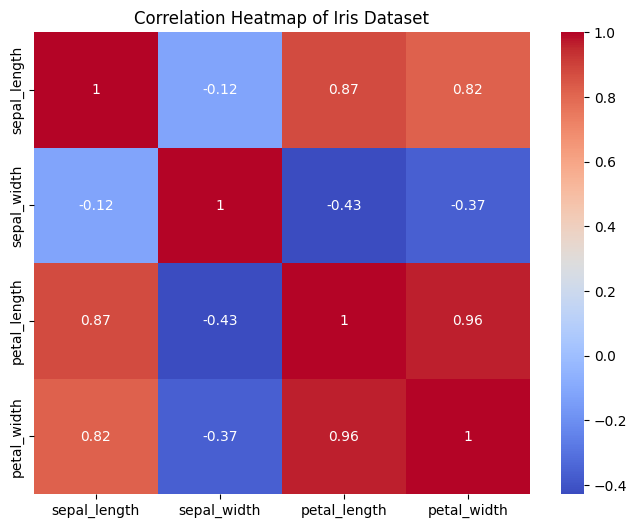

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from Seaborn
iris = sns.load_dataset("iris")
numeric_iris = iris.drop(columns='species')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris.head())

# Summary statistics
print("\nSummary statistics:")
print(iris.describe())

# Checking for missing values
print("\nMissing values:")
print(iris.isnull().sum())

# Visualizations
# Pairplot
sns.pairplot(iris, hue="species")
plt.title("Pairplot of Iris Dataset")
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, orient="h")
plt.title("Boxplot of Iris Dataset")
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
iris.hist()
plt.suptitle("Histograms of Iris Dataset")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_iris.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

Training score: 0.7508856358979673
Testing score: 0.6687594935356325


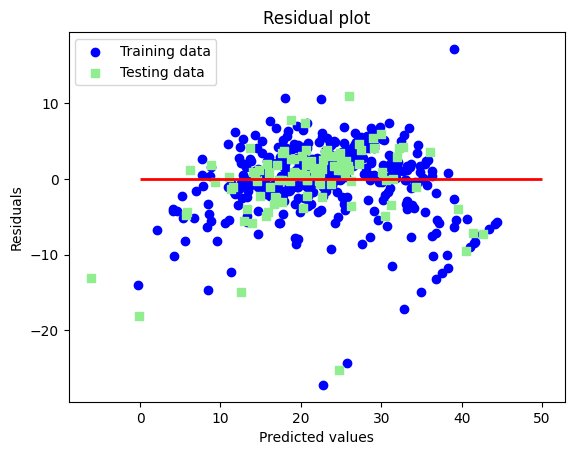

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Load the Boston housing dataset

X = data
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training score:", train_score)
print("Testing score:", test_score)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=50, lw=2, color='red')
plt.title('Residual plot')
plt.show()

In [ ]:
from PIL import Image
import os

def get_size_format(b, factor=1024, suffix="B"):
    """
    Scale bytes to its proper byte format.
    e.g: 1253656 => '1.20MB', 1253656678 => '1.17GB'
    """
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"

def compress_img(image_name, new_size_ratio=0.9, quality=90, width=None, height=None, to_jpg=True):
    # Load the image into memory
    img = Image.open(image_name)

    # Print the original image shape
    print("[*] Image shape:", img.size)

    # Get the original image size in bytes
    image_size = os.path.getsize(image_name)
    print("[*] Size before compression:", get_size_format(image_size))

    if new_size_ratio < 1.0:
        # If resizing ratio is below 1.0, multiply width & height with this ratio to reduce image size
        img = img.resize((int(img.size[0] * new_size_ratio), int(img.size[1] * new_size_ratio)), Image.ANTIALIAS)
    elif width and height:
        # If width and height are set, resize with them instead
        img = img.resize((width, height), Image.ANTIALIAS)

    # Split the filename and extension
    filename, ext = os.path.splitext(image_name)

    # Make a new filename appending "_compressed" to the original file name
    if to_jpg:
        # Change the extension to JPEG
        new_filename = f"{filename}_compressed.jpg"
    else:
        # Retain the same extension of the original image
        new_filename = f"{filename}_compressed{ext}"

    # Save the compressed image
    img.save(new_filename, optimize=True, quality=quality)

    # Print the new image shape
    print("[+] New Image shape:", img.size)
    print(f"[*] Compressed image saved as: {new_filename}")

# Example usage:
Input = input()
compress_img(Input, new_size_ratio=0.8, quality=80, width=800, height=600)